In [ ]:
-!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


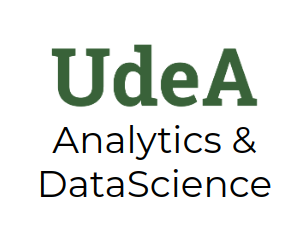

In [ ]:
Image("local/imgs/udea-datascience.png")

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Posgrado en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

# Tipo de Datos - Parte 1

In [ ]:
import pandas as pd
import numpy as np
import io
import requests
from sklearn.preprocessing import OneHotEncoder # Librería donde está el método One-Hot Encoder
from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
from collections import defaultdict # Para generar un diccionario nuevo de valores
from sklearn.preprocessing import MultiLabelBinarizer # Codificación binarizador Múltiple

## Definción de matriz de datos

**Datos**: Son observaciones de fenómenos del mundo real o de sucesos. Cada parte de los datos representa un aspecto limitado de la realidad pero una colección de ellos muestra una "imagen o representación" global de varios acontencimientos del mundo real. 

**Definición formal de los datos:** Dado un conjunto de datos, $X$, decimos que $x_{n,d}$ es un elemento de $X$ tal que $n$ es una observación o *muestra* y $d$ es un descriptor o *característica*, donde $X$ es una matriz representado como:

$$X = \begin{bmatrix} x_{1,1} & \cdots& x_{1,d} & \cdots&  x_{1,D} \\
\vdots & \cdots& \ddots & \cdots&  \vdots \\
x_{n,1} & \cdots& x_{n,d} & \cdots&  x_{n,D} \\
\vdots & \cdots& \ddots & \cdots&  \vdots \\
x_{N,1} & \cdots& x_{N,d} & \cdots&  x_{N,D} \\
\end{bmatrix}_{N x D} $$

siendo $N$ el número de muestras u observaciones y $D$ el número de características.

**Característica o Descriptor o Atributo:** Es una representación numérica de un conjunto de datos qe puede representar una cantidad de acontecimientos, sucesos o hechos del mundo real. Por lo general, las características se difieren desde el tipo de dato (que se explicará más adelante) que este disponible en el conjunto de datos. Una característica puede representar, por ejemplo, temperatura, presión, número de clientes por día, fechas, etc.

Los datos pueden ser de diferentes fuentes: **categóricas, cuantitativas, cualitativas, mixtas, imágenes, texto, etc.**. Para esta sección, se mostrará las dos primeras.

## Analizando datos categóricos

**Datos Categóricos:** Son datos que representa categorías o etiquetas, por ejemplo, las ciudades más grandes de un país, las cuatro temporadas del año, los equipos de fútbol en España, etc. Por lo general, los datos categóricos son *finitos* y los valores categóricos se pueden representar numéricamente. No obstante, se puede presentar dos escenarios: 

*Características Ordinales:* Son valores categóricos que pueden ser clasificados de forma ordenada, por ejemplo, que $0 \leq 1 \leq 10$.

*Características Nominales:* Son valores categóricos que no tienen ningún orden. Por ejemplo, Real Madrid es más grande o más pequeño que Barcelona ¿Cómo saber que es más grande y más pequeño?

Considerando ambos escenarios, dentro de los datos categóricos, existen varios métodos para codificar las variables categóricas que analizaremos a continuación:

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/adult.data"
download = requests.get(url).content
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
            'marital-status', 'occupation', 'relationship', 'race', 'gender', 
            'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',', 
                     names = columnas, decimal = ',', header = None) 
# Esimportante codificarlo a utf-8
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### One-Hot Encoding

**Codificación de un solo paso (One-Hot Encoding):** Es un método que codifica en un grupo de bits los valores categóricos. Cada bit representa una posible categórica y por regla general, la variable categórica no puede pertenecer a múltiples categorías de una sola vez, por lo que solamente 1 bit en el grupo puede estar activo. Un ejemplo sencillo es el siguiente:

Equipo de futbol $\,\,\,\,\,$ e1 $\,\,\,\,\,$ e2 $\,\,\,\,\,$ e3 $\,\,\,\,\,$ e4

Real Madrid$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,$ 0

Barcelona$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,$ 0

Sevilla $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,$ 0

Alaves $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,$ 1

In [ ]:
data['workclass'].astype('category')

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: category
Categories (9, object): [' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ...,
                         ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

In [ ]:
data['education'].astype('category')

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: category
Categories (16, object): [' 10th', ' 11th', ' 12th', ' 1st-4th', ..., ' Masters', ' Preschool',
                          ' Prof-school', ' Some-college']

In [ ]:
data['marital-status'].astype('category')

0              Never-married
1         Married-civ-spouse
2                   Divorced
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32556     Married-civ-spouse
32557     Married-civ-spouse
32558                Widowed
32559          Never-married
32560     Married-civ-spouse
Name: marital-status, Length: 32561, dtype: category
Categories (7, object): [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                         ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']

In [ ]:
data['relationship'].astype('category')

0         Not-in-family
1               Husband
2         Not-in-family
3               Husband
4                  Wife
              ...      
32556              Wife
32557           Husband
32558         Unmarried
32559         Own-child
32560              Wife
Name: relationship, Length: 32561, dtype: category
Categories (6, object): [' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
                         ' Unmarried', ' Wife']

In [ ]:
data['race'].astype('category')

0         White
1         White
2         White
3         Black
4         Black
          ...  
32556     White
32557     White
32558     White
32559     White
32560     White
Name: race, Length: 32561, dtype: category
Categories (5, object): [' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']

In [ ]:
data['gender'].astype('category')

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name: gender, Length: 32561, dtype: category
Categories (2, object): [' Female', ' Male']

In [ ]:
data['native-country'].astype('category')

0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: native-country, Length: 32561, dtype: category
Categories (42, object): [' ?', ' Cambodia', ' Canada', ' China', ..., ' Trinadad&Tobago',
                          ' United-States', ' Vietnam', ' Yugoslavia']

In [ ]:
datos_categoricos = data[['workclass','education', 'marital-status', 
                          'occupation', 'relationship', 
                          'race', 'gender', 'native-country']]# Seleccionamos aquellas características con datos
datos_categoricos.shape  # Tamaño de los datos categóricos                                                                                                                                      # categóricos

(32561, 8)

In [ ]:
ENC = OneHotEncoder(handle_unknown='ignore') # One-Hot Encoding. El parámetro handle_unknown define si una característica categórica está presente durante la transformación
                                             # Si se utiliza la opción 'ignore' significa que si hay una categoría desconocida y es encontrado durante la transformación,
                                             # el resultado de las columnas codificadas serán 0. Si se utiliza 'error', entonces se codificara las categorías desconocidas como None.
ENC.fit(datos_categoricos) # Aplicamos el método One-Hot Enconding

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ENC.categories_ # Determina las categorias cada característica determinadas durante la transformación.

[array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried'

Como hay datos faltantes simbolizados como ?, vamos a reemplazar por la palabra *Nothing*, para lograr más adelante la codificación de los datos categóricos

In [ ]:
datos_categoricos = datos_categoricos.replace(' ?','Nothing') # Nota: se agrego un espacio a la categoria ? 
                                                              # porque la base de datos se observa ese espacio

Una vez realizado este paso, vamos a proceder a aplicar de nuevo el método One-Hot Encoding

In [ ]:
ENC.fit(datos_categoricos) # Aplicamos el método One-Hot Enconding

OneHotEncoder(handle_unknown='ignore')

Una vez verificado el cambio de la categoria ? por *Nothing*, vamos a transformar los datos

In [ ]:
data_ENC = ENC.transform(datos_categoricos).toarray() # Codificación One-Hot Encoding
display(data_ENC)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print('Número de características codificadas: ', data_ENC.shape[1])

Número de características codificadas:  102


In [ ]:
data_ENC.shape

(32561, 102)

Debido a la forma como se codifica los datos categóricos, el número de características aumenta debido a que el método considera cada columna de la base de datos con la nomenclatura: Caracteristica/Categoría. Por ejemplo: workclass/ Federal-gov, workclass/ Local-gov, etc... A continuación, se puede aplicar la transformada inversa del método One-Hot Encoding

In [ ]:
ENC.inverse_transform(data_ENC) # Decodificación

array([[' State-gov', ' Bachelors', ' Never-married', ..., ' White',
        ' Male', ' United-States'],
       [' Self-emp-not-inc', ' Bachelors', ' Married-civ-spouse', ...,
        ' White', ' Male', ' United-States'],
       [' Private', ' HS-grad', ' Divorced', ..., ' White', ' Male',
        ' United-States'],
       ...,
       [' Private', ' HS-grad', ' Widowed', ..., ' White', ' Female',
        ' United-States'],
       [' Private', ' HS-grad', ' Never-married', ..., ' White', ' Male',
        ' United-States'],
       [' Self-emp-inc', ' HS-grad', ' Married-civ-spouse', ...,
        ' White', ' Female', ' United-States']], dtype=object)

Con la transformada inversa, se verifica si la codificación ejecutada coincide con las categorías originales de la base de datos

Ahora vamos a organizar nuestra base de datos con los nombres caracteristica/categoria para cada columna de la base de datos categóricos

In [ ]:
Car_Cat = ENC.get_feature_names_out()

#Car_Cat = ENC.get_feature_names_out(['workclass','education', 'marital,status', 
                                 #'occupation', 
                                 #'relationship', 'race', 'gender', 
                                 #'native-country'])

In [ ]:
Car_Cat

array(['workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'workclass_Nothing', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occu

In [ ]:
data_ENC = pd.DataFrame(data_ENC, columns = Car_Cat)
display(data_ENC)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Nothing,education_ 10th,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Nothing
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


En la codificación de un solo paso, utiliza más de un bit para su codificación, lo cual el número de características codificadas aumenta. Por ejemplo, si hay k-1 de los bits son 0, entonces el último bit debe ser 1 debido a que la variable debe tomar un 1 en k valores. Lo anterior se debe a que la suma de todos los bits por cada muestra u observación es igual a 1:

$n=1\,\,\,\, e_1 + e_2 + e_k = 1$

$n=2\,\,\,\, e_1 + e_2 + e_k = 1$

$\vdots \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots$

$n=N\,\,\,\, e_1 + e_2 + e_k = 1$

donde cada $e_c$ es 0 o 1.

**Limitante de la codificación de una sola vez:** Genera demasiados grados de libertad o k valores que incrementa la dimensionalidad de los datos cuando las variables solo requiere k-1 valores.

### Dummy Encoding

**Codificación simulada (Dummy Coding)**: Este método se encarga de remover los grados de libertad extra genera la codificación de una sola vez o one-hot encoding, usando solamente *k-1 características*. En este caso, una característica es puesta debajo de las otras características por medio de un vector de todos 0, lo cual es la **categoría de referencia**. Lo anterior se puede representar mediante el siguiente ejemplo:

Equipo de futbol $\,\,\,\,\,$ e1 $\,\,\,\,\,$ e2 $\,\,\,\,\,$ e3

Real Madrid$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 

Barcelona$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 

Sevilla $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 

Alaves $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0

In [ ]:
data_cat_Dummy = pd.get_dummies(datos_categoricos, drop_first = True) # Codificación simulada. El parámetro drop_first permite sacar las k-1 simulaciones 
                                                         # de los niveles categóricos, eliminando el primer nivel de codificación.
display(data_cat_Dummy)

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Nothing,education_ 11th,education_ 12th,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Nothing
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Observen que la codificación Dummy Encoding reduce una parte del número de características codificadas con respecto al método de One-Hot Encoding. Además, en pocas líneas de código se logra hacer los mismos pasos con respecto al método One-Hot Encoding

### Codificación de Efectos

Es un método similar a la codificaciíon simulada o Dummy Encoding pero la categoría de referencia es representado por vectores de todos "-1". Este tipo de codificación es muy usual cuando se desea crear modelos de regresión lineal a partir de datos categóricos (que lo verán en detalle en la materia de aprendizaje automático 1).

In [ ]:
data_cat_Dummy_Efecto = data_cat_Dummy.copy()
data_cat_Dummy_Efecto = data_cat_Dummy.replace(0,'-1').astype('float32') # Reemplazar 0 por -1
display(data_cat_Dummy_Efecto)

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Nothing,education_ 11th,education_ 12th,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Nothing
0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
32557,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
32558,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
32559,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0


### Codificación de Etiquetas

**Codificación de etiquetas (LabelEncoder):** Es un método de codificación donde realiza una etiquetación de los valores categóricos de cada características desde 0 hasta $N_{clases}-1$. Por ejemplo, si en una característica hay un vector de valores categóricos donde solo representa "Real Madrid", "Barcelona" y "Sevilla", entonces "Real Madrid" es etiquetado como 0 y "Barcelona" es etiquetado como 1 y "Sevilla" es etiquetado como 2.

In [ ]:
LE = defaultdict(LabelEncoder)
data_LE = datos_categoricos.apply(lambda x: LE[x.name].fit_transform(x))
display(data_LE)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,6,9,4,0,1,4,1,38
1,5,9,2,3,0,4,1,38
2,3,11,0,5,1,4,1,38
3,3,1,2,5,0,2,1,38
4,3,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...
32556,3,7,2,12,5,4,0,38
32557,3,11,2,6,0,4,1,38
32558,3,11,6,0,4,4,0,38
32559,3,11,4,0,3,4,1,38


In [ ]:
data_LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   workclass       32561 non-null  int64
 1   education       32561 non-null  int64
 2   marital-status  32561 non-null  int64
 3   occupation      32561 non-null  int64
 4   relationship    32561 non-null  int64
 5   race            32561 non-null  int64
 6   gender          32561 non-null  int64
 7   native-country  32561 non-null  int64
dtypes: int64(8)
memory usage: 2.0 MB


In [ ]:
Datos_Completos_con_LE = np.vstack((data['age'], data_LE['workclass'], data['fnlwgt'], 
                                    data_LE['education'], data['education-num'],
                                    data_LE['marital-status'],data_LE['occupation'], 
                                    data_LE['relationship'], data_LE['race'], data_LE['gender'], 
                                    data['capital-gain'],
                                    data['capital-loss'],data['hours-per-week'],
                                    data_LE['native-country'], data['income'] )).T # Impotante aplicar la transpuesta

Datos_Completos_con_LE = pd.DataFrame(Datos_Completos_con_LE, columns = columnas)

display(Datos_Completos_con_LE)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,<=50K


Falta transformar la característica income

In [ ]:
LE_New = LabelEncoder()
Datos_Completos_con_LE['income'] = LE_New.fit_transform(Datos_Completos_con_LE['income'])
display(Datos_Completos_con_LE)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


Vamos a inspeccionar si aún presenta algún dato faltante

In [ ]:
Datos_Completos_con_LE = Datos_Completos_con_LE.replace(" ?", np.nan) # Reemplazamos los datos ? por datos NaN o nulos si los hay
Datos_Completos_con_LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 3.7+ MB


Ahora tranformamos el tipo de variable `object` en entero.


In [ ]:
Data_Final = []

for d in range(Datos_Completos_con_LE.shape[1]):
  Data_Final.append(pd.to_numeric(Datos_Completos_con_LE.iloc[:,d], errors='coerce'))

Data_Final = pd.DataFrame(np.array(Data_Final).T, columns = columnas)
display(Data_Final)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   gender          32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


### Codificación Binarizador

**Codificación binarizador (LabelBinarizer):** Es un método de codificación llamada también *one-vs-all (OvA)*, en cual amplia un clasificador binario a problemas de múltiples etiquetas.

In [ ]:
MLB = MultiLabelBinarizer()
Datos_LB = MLB.fit_transform([(1, 2), (3, 2), (4, 2), (5, 3)]) 
display(Datos_LB)

array([[1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1]])

In [ ]:
MLB.classes_

array([1, 2, 3, 4, 5])

### Ventajas y Desventajas de la Codificación de Valores Categóricos

**Ventajas de la codificación de las valores categóricos:** Por lo general, la codificación de una sola vez o one-hot encoding genera redudancia de los datos que es útil para validar modelos de machine learning de un mismo problema que se esta resolviendo con la base de datos. Por otra parte, la codificación simulada o dummy coding no genera redudancia de los datos y mejora la interpretabilidad de los modelos de machine learning. En el caso de la codificación de efectos o effect coding, tampoco genera redundancia de los datos con el simple hecho que se utiliza -1.0 para la categoría de referencia.

**Desventajas de la codificación de los valores categóricos:** Para el caso de one-hot encoding, la redundancia de los datos genera problemas de interpretabilidad de los modelos cuando el tamaño original de los datos tiene una alta dimensionalidad, lo cual hace díficil su aplicabilidad en esos escenarios. Por otra parte, dummy coding no es fácil de utilizar cuando existe un gran número de datos faltantes porque los asume como categorías de referencia, generando redundancia de vectores de 0. En cambio, effect coding evita el problema de dummy coding con los datos faltantes a relacionarlos como vectores de -1.0, pero almacenar estas cantidades de -1.0 genera un alto costo de máquina y almacenamiento computacional.

## Analizando datos cuantitativos

### Aplicación por columnas y funciones múltiples

Son datos que expresan cantidades numéricas expresados como números naturales, enteros, racionales o reales. Por lo general, los datos cuantitativos expresan valores tomados de un conjunto de sensores, de recopilación de estadísticas, etc.

In [ ]:
Datos_Originales_Sin_Datos_Faltantes = np.vstack((data['age'], datos_categoricos['workclass'], data['fnlwgt'], 
                                                  datos_categoricos['education'], data['education-num'],
                                    datos_categoricos['marital-status'], datos_categoricos['occupation'], 
                                    datos_categoricos['relationship'], datos_categoricos['race'], 
                                    datos_categoricos['gender'], data['capital-gain'], 
                                    data['capital-loss'], data['hours-per-week'],
                                    datos_categoricos['native-country'], data['income'])).T # Impotante aplicar la transpuesta

Datos_Originales_Sin_Datos_Faltantes = pd.DataFrame(Datos_Originales_Sin_Datos_Faltantes, columns = columnas)
display(Datos_Originales_Sin_Datos_Faltantes)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
Datos_Originales_Sin_Datos_Faltantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


Antes de relacionar la característica numérica, se debe convertir los datos tipo *object* a *int* o *float*

In [ ]:
Datos_Originales_Sin_Datos_Faltantes['age'] = Datos_Originales_Sin_Datos_Faltantes['age'].astype('int64')
Datos_Originales_Sin_Datos_Faltantes['age']

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

Vamos a realizar un grupo de datos categorícos con datos numéricos

In [ ]:
datos_categoricos_agrupados = Datos_Originales_Sin_Datos_Faltantes.groupby(['workclass', 'native-country'])

In [ ]:
datos_categoricos_agrupados

Los datos categóricos agrupados de las características 'workclass' y 'native-country' se relacionarán con una característica cuantitativo llamado 'age'

In [ ]:
datos_agrupados_con_caracteristica_numerica = datos_categoricos_agrupados['age']

Vamos a agregar un estadístico como la *media* para relacionar los datos categóricos seleccionados con los datos numéricos de la edad

In [ ]:
datos_agrupados_con_caracteristica_numerica.agg('mean')

workclass     native-country  
 Federal-gov   Cambodia           34.000000
               Canada             55.000000
               China              64.000000
               Columbia           35.500000
               Cuba               30.500000
                                    ...    
Nothing        Thailand           22.000000
               Trinadad&Tobago    17.000000
               United-States      41.241712
               Vietnam            48.666667
              Nothing             38.185185
Name: age, Length: 232, dtype: float64

Como se puede apreciar, esta estrategía permite relacionar características categóricas con características cuantitativas, mediante un estadístico de interés. También podemos agregar otros estadísticos:

In [ ]:
datos_agrupados_con_caracteristica_numerica.agg(['median', 'std'])

median        std
workclass    native-country                     
 Federal-gov  Cambodia           34.0        NaN
              Canada             55.0  24.041631
              China              64.0        NaN
              Columbia           35.5  13.435029
              Cuba               30.5   0.707107
...                               ...        ...
Nothing       Thailand           22.0        NaN
              Trinadad&Tobago    17.0        NaN
              United-States      35.0  20.514199
              Vietnam            52.0  26.159766
             Nothing             33.0  16.335514

[232 rows x 2 columns]

Podemos agregar una función con varios estadísticos y métricas de interés

In [ ]:
funciones = ['count', 'mean', 'max']
Resultados = datos_agrupados_con_caracteristica_numerica.agg(funciones)
Resultados

count       mean  max
workclass    native-country                         
 Federal-gov  Cambodia             1  34.000000   34
              Canada               2  55.000000   72
              China                1  64.000000   64
              Columbia             2  35.500000   45
              Cuba                 2  30.500000   31
...                              ...        ...  ...
Nothing       Thailand             1  22.000000   22
              Trinadad&Tobago      1  17.000000   17
              United-States     1659  41.241712   90
              Vietnam              3  48.666667   73
             Nothing              27  38.185185   81

[232 rows x 3 columns]

Para observar todos los resultados, utilizamos las siguientes líneas de código

In [ ]:
pd.set_option('display.max_rows', 232) # Se colocan el numéro todas de filas que se obtiene de la variable **Resultados** 
display(Resultados)

count       mean  max
workclass         native-country                                    
 Federal-gov       Cambodia                        1  34.000000   34
                   Canada                          2  55.000000   72
                   China                           1  64.000000   64
                   Columbia                        2  35.500000   45
                   Cuba                            2  30.500000   31
                   El-Salvador                     2  39.000000   51
                   England                         4  40.500000   60
                   France                          1  53.000000   53
                   Germany                         5  50.200000   59
                   Guatemala                       1  45.000000   45
                   India                           2  42.000000   43
                   Iran                            2  35.000000   38
                   Italy                           1  62.000000   62
                   Japan                           3  31.000000   37
                   Laos                            1  56.000000   56
                   Mexico                          1  35.000000   35
                   Nicaragua                       1  33.000000   33
                   Philippines                    12  39.500000   53
                   Poland                          1  23.000000   23
                   Portugal                        1  56.000000   56
                   Puerto-Rico                     8  47.875000   64
                   South                           1  42.000000   42
                   United-States                 886  42.579007   90
                   Vietnam                         2  43.000000   51
                  Nothing                         17  43.294118   64
 Local-gov         Canada                          6  41.000000   62
                   China                           3  38.333333   56
                   Cuba                            4  41.250000   63
                   Dominican-Republic              3  47.333333   53
                   Ecuador                         1  29.000000   29
                   El-Salvador                     5  36.400000   47
                   England                         5  33.000000   40
                   France                          3  39.333333   49
                   Germany                         9  33.777778   43
                   Greece                          1  65.000000   65
                   Guatemala                       3  22.000000   23
                   Haiti                           4  33.000000   58
                   Honduras                        1  36.000000   36
                   Hong                            1  28.000000   28
                   India                           2  41.000000   57
                   Iran                            2  45.500000   62
                   Italy                           2  37.000000   49
                   Jamaica                         4  43.500000   66
                   Japan                           1  39.000000   39
                   Laos                            1  50.000000   50
                   Mexico                         18  44.444444   61
                   Nicaragua                       2  34.000000   39
                   Outlying-US(Guam-USVI-etc)      1  63.000000   63
                   Peru                            1  26.000000   26
                   Philippines                    10  51.100000   90
                   Poland                          3  51.666667   73
                   Portugal                        1  34.000000   34
                   Puerto-Rico                     7  34.714286   47
                   Taiwan                          2  35.000000   41
                   Trinadad&Tobago                 1  28.000000   28
                   United-States                1956  41.849182   90
                   Vietnam                   

Analicemos que sucede si relacionamos dos características cuantitativas con dos características categóricas

In [ ]:
Datos_Originales_Sin_Datos_Faltantes['age'] = Datos_Originales_Sin_Datos_Faltantes['age'].astype('int64')
Datos_Originales_Sin_Datos_Faltantes['hours-per-week'] = Datos_Originales_Sin_Datos_Faltantes['hours-per-week'].astype('int64')
datos_categoricos_agrupados = Datos_Originales_Sin_Datos_Faltantes.groupby(['workclass', 'native-country'])
datos_agrupados_con_caracteristica_numerica = datos_categoricos_agrupados[['age','hours-per-week']]

In [ ]:
datos_agrupados_con_caracteristica_numerica.agg({'age' : ['min', 'max', 'mean', 'std'], 
                                                 'hours-per-week' : 'mean'})

age                            \
                                              min max       mean        std   
workclass         native-country                                              
 Federal-gov       Cambodia                    34  34  34.000000        NaN   
                   Canada                      38  72  55.000000  24.041631   
                   China                       64  64  64.000000        NaN   
                   Columbia                    26  45  35.500000  13.435029   
                   Cuba                        30  31  30.500000   0.707107   
                   El-Salvador                 27  51  39.000000  16.970563   
                   England                     19  60  40.500000  17.175564   
                   France                      53  53  53.000000        NaN   
                   Germany                     46  59  50.200000   5.718391   
                   Guatemala                   45  45  45.000000        NaN   
                   India                       41  43  42.000000   1.414214   
                   Iran                        32  38  35.000000   4.242641   
                   Italy                       62  62  62.000000        NaN   
                   Japan                       26  37  31.000000   5.567764   
                   Laos                        56  56  56.000000        NaN   
                   Mexico                      35  35  35.000000        NaN   
                   Nicaragua                   33  33  33.000000        NaN   
                   Philippines                 18  53  39.500000   8.251722   
                   Poland                      23  23  23.000000        NaN   
                   Portugal                    56  56  56.000000        NaN   
                   Puerto-Rico                 28  64  47.875000  11.945561   
                   South                       42  42  42.000000        NaN   
                   United-States               17  90  42.579007  11.520749   
                   Vietnam                     35  51  43.000000  11.313708   
                  Nothing                      24  64  43.294118  10.396903   
 Local-gov         Canada                      26  62  41.000000  12.099587   
                   China                       23  56  38.333333  16.623277   
                   Cuba                        23  63  41.250000  16.859715   
                   Dominican-Republic          39  53  47.333333   7.371115   
                   Ecuador                     29  29  29.000000        NaN   
                   El-Salvador                 26  47  36.400000   8.203658   
                   England                     26  40  33.000000   6.324555   
                   France                      32  49  39.333333   8.736895   
                   Germany                     29  43  33.777778   4.323707   
                   Greece                      65  65  65.000000        NaN   
                   Guatemala                   21  23  22.000000   1.000000   
                   Haiti                       22  58  33.000000  16.852300   
                   Honduras                    36  36  36.000000        NaN   
                   Hong                        28  28  28.000000        NaN   
                   India                       25  57  41.000000  22.627417   
                   Iran                        29  62  45.500000  23.334524   
                   Italy                       25  49  37.000000  16.970563   
                   Jamaica                     26  66  43.500000  16.763055   
                   Japan                       39  39  39.000000        NaN   
                   Laos                        50  50  50.000000        NaN   
                   Mexico                      21  61  44.444444  10.896423   
                   Nicaragua                   29  39  34.000000   7.071068   
                   Outlying-US(Guam-USVI-etc)  63  63  63.000000        NaN   
                 